### Codio Activity 13.6: Use L1 Regularization to Select Features

This activity focuses on using the L1 regularization penalty to select features in a classification setting.  In the following, you will explore the value of different coefficients as you increase regularization.  Be sure to use the `liblinear` solver in your models throughout.

### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV


import seaborn as sns

### The Data

For this exercise you will use the built in dataset from seaborn containing information on passengers on the Titanic.  Here, you will only use the numeric features.  The data is loaded and prepared below.  We will only use one set for `X` and `y` to explore the effect of added regularization. 

In [63]:
data = sns.load_dataset('Titanic').dropna()
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [64]:
X = data.select_dtypes(np.number).drop('survived', axis = 1)
X.head()

,pclass,age,sibsp,parch,fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,1,54.0,0,0,51.8625
10,3,4.0,1,1,16.7000
11,1,58.0,0,0,26.5500


In [65]:
y = data.survived
y.head()

1     1
3     1
6     0
10    1
11    1
Name: survived, dtype: int64

### Problem 1

#### Scaling the Data

Because we are using regularization, it is important to have each of the features represented on the same scale.  To do so, instantiate a `StandardScaler` scaler and assign it to the `scaler` variable. Next, apply the function `fit_transform` to `scaler` with argument `X` to create `X_scaled` below.  

In [66]:
scaler = StandardScaler()
scaler

StandardScaler()

In [67]:
X_scaled = scaler.fit_transform(X)
X_scaled.mean()

np.float64(4.3920910864291905e-17)

### Problem 2

#### `C` values to explore

Next, you want to create an array of different `C` values to explore.  Remember that `C` is actually the inverse of regularization so small values are large amounts of regularization.  

Below, use a `for` loop to iterate over the values of `Cs`. Inside the `for` loop, instatinate a `LogisticRegression` classifier with L1 penalty, liblinear solver, `random_state=42`, and `max_iter=1000` and assign it to `lgr` and fit it to `X_scaled` and `y`.

Finally, append the coefficients of the model (`lgr.coef_[0]`) as a list to `coef_list`.


In [68]:
Cs = np.logspace(-5, .5)

In [69]:
coef_list = []
for i in Cs:
    lgr = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = i, random_state = 42, max_iter = 1000).fit(X_scaled,y)
    coef_list.append(list(lgr.coef_[0]))
      

In [70]:
coef_list[0]

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0)]

### Problem 3

#### DataFrame of Coefficients

Next, create a dataframe, `coef_df`, based on the coefficients in `coef_list`.  Set the index of this dataframe to the `Cs` values.  Assign the column names of the new dataframe from the columns of `X`.

In [71]:
coef_df = pd.DataFrame(coef_list, columns = X.columns)
coef_df.index = Cs
coef_df

,pclass,age,sibsp,parch,fare
0.000010,0.000000,0.000000,0.000000,0.000000,0.000000
0.000013,0.000000,0.000000,0.000000,0.000000,0.000000
0.000017,0.000000,0.000000,0.000000,0.000000,0.000000
0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
0.000028,0.000000,0.000000,0.000000,0.000000,0.000000
0.000036,0.000000,0.000000,0.000000,0.000000,0.000000
0.000047,0.000000,0.000000,0.000000,0.000000,0.000000
0.000061,0.000000,0.000000,0.000000,0.000000,0.000000
0.000079,0.000000,0.000000,0.000000,0.000000,0.000000
0.000102,0.000000,0.000000,0.000000,0.000000,0.000000


### Problem 4

#### Visualizing the Results

Below, the data from the coefficients is plotted.  Based on this plot, which feature seems more important -- `age` or `parch`?  Assign your answer as a string to `ans4` below.

<center>
    <img src = 'images/coefl1.png' />
</center>

Text(0.5, 0, 'Increasing 1/C')

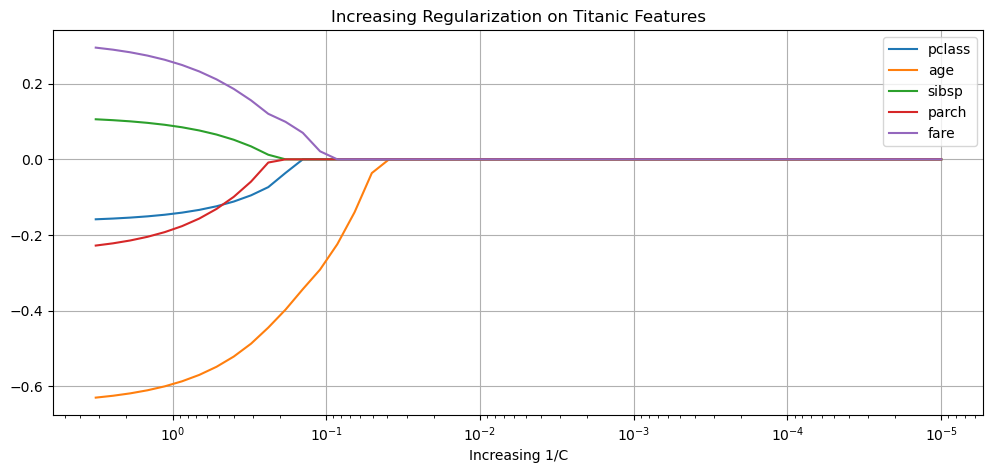

In [72]:
plt.figure(figsize = (12, 5))
plt.semilogx(coef_df)
plt.gca().invert_xaxis()
plt.grid()
plt.legend(list(coef_df.columns));
plt.title('Increasing Regularization on Titanic Features')
plt.xlabel("Increasing 1/C")
#plt.savefig('images/coefl1.png')

In [73]:
ans4 = 'age'

### Problem 5

#### Using `SelectFromModel`

In a similar manner, you can use `SelectFromModel` together with `LogisticRegression` to select features based on coefficient values.  

Below, create an instance of the `SelectFromModel` selector with a `LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear', random_state = 43)` as the estimator and assign it to the `selector` variable.  Use the `fit_transform` function on `selector ` to fit the data `X_scaled` and `y` to select the two most important features.  

Assign their names as a list to `best_features` below.

In [77]:
selector = SelectFromModel(LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear', random_state = 43))
selector

SelectFromModel(estimator=LogisticRegression(C=0.1, penalty='l1',
                                             random_state=43,
                                             solver='liblinear'))

In [78]:
ans = selector.fit_transform(X_scaled,y)

In [79]:
selector.get_feature_names_out()

array(['x1', 'x4'], dtype=object)

In [80]:
best_features = ['age', 'fare']

### Codio Activity 13.7: Multi-Class Logistic Regression

This activity focuses on implementing `LogisticRegression` estimator using three approaches for multi class classification.  Two of these, one vs. rest and multinomial, are available using the estimator directly.  The third example, one vs. one, is implemented from the scikit-learn `multiclass` module.  Most important is that you can consider each of these models as options when building classification models and that you select the best depending on your identified metric.

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier

### The Data

Below, the `penguins` data is loaded and the target feature for all classes is converted to a numeric value.  Thus, we have three classes where 0, 1, and 2 represent Adelie, Chinstrap, and Gentoo respectively.  

In [33]:
penguins = sns.load_dataset('penguins').dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [34]:
X = penguins.drop(['species','island','sex'], axis = 1)
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [35]:
y = penguins['species']
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [39]:
y_num = pd.factorize(y)[0]
y_num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [40]:
catergories = pd.factorize(y)[1]
catergories

Index(['Adelie', 'Chinstrap', 'Gentoo'], dtype='object')

pd.factorize() is a pandas function that encodes an array-like object into numeric labels — assigning a unique integer to each distinct value. This is useful for converting categorical data into a format that can be used in machine learning or numerical analysis.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 518)

### Problem 1

#### One vs. Rest Classification

To begin, use the `LogisticRegression` estimator with the argument `multi_class = 'ovr'`, `max_iter=1000`, and `random_state = 42` to instantiate a model named `ovr_lgr`. The use itto fit the model on the training data.

In [42]:
ovr_lgr = LogisticRegression(multi_class = 'ovr',max_iter = 1000, random_state = 42)
ovr_lgr

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

In [43]:
ovr_lgr.fit(X_train,y_train)

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

### Problem 2

#### Examining the Probabilities

Use the `predict_proba` function to examine the predicted probabilities on the testing data.  Assign these to `ovr_probs` as an array below.  

In [44]:
ovr_probs = ovr_lgr.predict_proba(X_test)

In [45]:
pd.DataFrame(ovr_probs, columns = ['p(adelie)', 'p(gentoo)', 'p(chinstrap)']).head()

,p(adelie),p(gentoo),p(chinstrap)
0,9.999683e-01,2.351645e-05,0.000008
1,2.123894e-04,6.596598e-05,0.999722
2,6.624714e-05,1.189697e-07,0.999934
3,2.560999e-07,8.895053e-04,0.999110
4,9.878621e-01,1.682213e-10,0.012138


### Problem 3

#### Trying multinomial

Now, instatiate a `LogisticRegression` estimator with `max_iter=10000`, `multi_class = 'multinomial'` and `random_state = 42`.  Fit the model on the training data as `multi_lgr` below.

In [46]:
multi_lgr = LogisticRegression(max_iter = 10000, multi_class = 'multinomial', random_state = 42)
multi_lgr.fit(X_train, y_train)

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)

### Problem 4

#### Examining the Probabilities

Again, use the `predict_proba` function to examine the probabilities from the multinomial estimator above on the test data.  Assign them as an array to `multi_probs` below. 

In [47]:
multi_probs = multi_lgr.predict_proba(X_test)
multi_probs

array([[9.99995492e-01, 3.96604975e-06, 5.41727977e-07],
       [3.89274193e-04, 6.05169369e-04, 9.99005556e-01],
       [1.34433707e-07, 3.78264093e-09, 9.99999862e-01],
       [3.42745039e-08, 1.30547158e-05, 9.99986911e-01],
       [9.99954784e-01, 6.13098664e-10, 4.52151368e-05],
       [7.90402475e-05, 9.99919362e-01, 1.59814363e-06],
       [9.99997972e-01, 2.33030381e-07, 1.79468667e-06],
       [2.62818937e-04, 9.99735096e-01, 2.08547112e-06],
       [9.99999695e-01, 1.71777250e-07, 1.33501975e-07],
       [9.99999096e-01, 2.03360996e-07, 7.00199719e-07],
       [2.16918606e-08, 7.07667481e-05, 9.99929212e-01],
       [1.05099596e-06, 9.99998179e-01, 7.69666912e-07],
       [7.38254150e-10, 9.99999941e-01, 5.82586317e-08],
       [9.99999962e-01, 5.10234774e-09, 3.32609177e-08],
       [2.53048106e-04, 9.98832300e-01, 9.14651543e-04],
       [2.64124990e-05, 5.96416797e-08, 9.99973528e-01],
       [9.98354875e-01, 1.33458611e-03, 3.10538768e-04],
       [1.74603284e-08, 9.99999

In [48]:
pd.DataFrame(multi_probs, columns = ['p(adelie)', 'p(gentoo)', 'p(chinstrap)']).head()

,p(adelie),p(gentoo),p(chinstrap)
0,9.999955e-01,3.966050e-06,5.417280e-07
1,3.892742e-04,6.051694e-04,9.990056e-01
2,1.344337e-07,3.782641e-09,9.999999e-01
3,3.427450e-08,1.305472e-05,9.999869e-01
4,9.999548e-01,6.130987e-10,4.521514e-05


### Problem 5

#### One vs. One Classifier

Similar in thinking to the one vs. rest approach, the one vs. one approach pairs every combination of the target class and builds a logistic model on this binary problem.  This means that for three classes you would have 6 different logistic regressors.  

The LogisticRegression estimator does not have this as a default. However, Scikit-learn implements this approach through the `OneVsOneClassifier` that accepts a classification estimator. 

Below, instantiate a `OneVsOneClassifier` estimator with a `LogisticRegression`  estimator with parsmeter `max_iter=1000` and `random_state = 42`as `ovo_clf`. Fit this to the training data.  

In [49]:
ovo_clf = OneVsOneClassifier(LogisticRegression(max_iter = 1000, random_state = 42)).fit(X_train,y_train)

In [50]:
ovo_clf

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000, random_state=42))

### Problem 6

#### Comparing Performance

Create a DataFrame that contains the scores on testing data in terms of accuracy.  Assign to `eval_df` below.  Which classifier performed best in terms of accuracy?  Assign your answer as a string -- `ovr`, `multi`, or `ovo` -- below to `best_acc`. 

| estimator | accuracy | 
| ------ | ------ |
| ovo | - |
| multi | - |
| ovo | - |

In [51]:
ovr_acc = accuracy_score(y_test, ovr_lgr.predict(X_test))
ovr_acc

0.9880952380952381

In [52]:
multi_acc = accuracy_score(y_test, multi_lgr.predict(X_test))
multi_acc

0.9880952380952381

In [54]:
ovo_acc = accuracy_score(y_test, ovo_clf.predict(X_test))
ovo_acc

0.9880952380952381

In [55]:
df = pd.DataFrame(
    {
        'estimator': ['ovr', 'multi', 'ovo'], 
        'accuracy': [ovr_acc, multi_acc, ovo_acc]
    }
)
df


,estimator,accuracy
0,ovr,0.988095
1,multi,0.988095
2,ovo,0.988095


In [57]:
best_acc = df.loc[df['accuracy'].idxmax()]['estimator']
best_acc

'ovr'

Hopefully this activity increased your facility with the `LogisticRegression` estimator and how it can be used in a multi-class setting.  Of course, these options are things you may consider in a grid search rather than fitting each on their own, however the One vs. One will have to implemented as its own object.  Further, many of the fitting procedures should raise warnings.  As seen before, there is regularization behind the scenes so scaling the data should happen prior to fitting.  Further, you may need to give the estimator more time for the gradient descent to converge, which you can control with the `max_iter` argument.